**Load and Inspect the Data**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load data
df = pd.read_csv("EcommerceData.csv")

In [2]:
df.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,None,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,None,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,None,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


In [3]:
# Check for nulls and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

**Clean the Data**

In [ ]:
# Step 1: Drop duplicate records
df.drop_duplicates(inplace=True)

# Step 2: Clean and convert the 'Purchase_Amount' column
df["Purchase_Amount"] = df["Purchase_Amount"].astype(str)  # Ensure all are strings
df["Purchase_Amount"] = df["Purchase_Amount"].replace('[\$,]', '', regex=True).str.strip()  # Remove $ and spaces
df["Purchase_Amount"] = pd.to_numeric(df["Purchase_Amount"], errors='coerce')  # Convert to float

# Step 3: Clean 'Time_of_Purchase' column
df["Time_of_Purchase"] = pd.to_datetime(df["Time_of_Purchase"], errors='coerce')

# Step 4: Handle missing values
# For numeric columns — use median
df["Purchase_Amount"].fillna(df["Purchase_Amount"].median(), inplace=True)
df["Customer_Satisfaction"].fillna(df["Customer_Satisfaction"].median(), inplace=True)
df["Time_to_Decision"].fillna(df["Time_to_Decision"].median(), inplace=True)

# For categorical columns — use mode
categorical_cols = [
    "Income_Level", "Gender", "Marital_Status", "Education_Level", "Occupation",
    "Location", "Purchase_Category", "Engagement_with_Ads", "Device_Used_for_Shopping",
    "Payment_Method", "Discount_Used", "Customer_Loyalty_Program_Member",
    "Purchase_Intent", "Shipping_Preference"
]

for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip()
    df[col].fillna(df[col].mode()[0], inplace=True)

# Optional: Standardize gender entries
df["Gender"] = df["Gender"].str.capitalize()

# Step 5: Final check
print("\nCleaned Data Info:")
print(df.info())


Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Customer_ID                            1000 non-null   object        
 1   Age                                    1000 non-null   int64         
 2   Gender                                 1000 non-null   object        
 3   Income_Level                           1000 non-null   object        
 4   Marital_Status                         1000 non-null   object        
 5   Education_Level                        1000 non-null   object        
 6   Occupation                             1000 non-null   object        
 7   Location                               1000 non-null   object        
 8   Purchase_Category                      1000 non-null   object        
 9   Purchase_Amount                        1000 

In [15]:
print(df["Purchase_Intent"].unique())

['Need-based' 'Wants-based' 'Impulsive' 'Planned']


In [16]:
# Map to numerical scale (you can adjust as needed)
intent_map = {
    'Impulse': 1,
    'Need-based': 2,
    'Planned': 3
}

df["Purchase_Intent"] = df["Purchase_Intent"].map(intent_map)

**Save Cleaned Data**

In [17]:
#save cleaned data
df.to_csv("cleaned_ecommerce_data.csv", index=False)

**Create Visualizations**

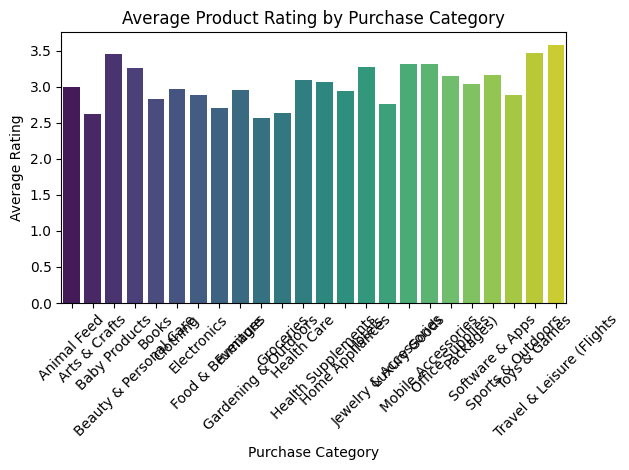

In [3]:
# Average Product Rating by Purchase Category
# Helps identify which product types perform better in customer experience.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_ecommerce_data.csv")

# Group and plot
rating_by_category = df.groupby("Purchase_Category")["Product_Rating"].mean().reset_index()

sns.barplot(data=rating_by_category, x="Purchase_Category", y="Product_Rating", palette="viridis")
plt.title("Average Product Rating by Purchase Category")
plt.xlabel("Purchase Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("charts/avg_rating_by_category.png")
plt.show()

C:\Users\ajit_\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  import sys


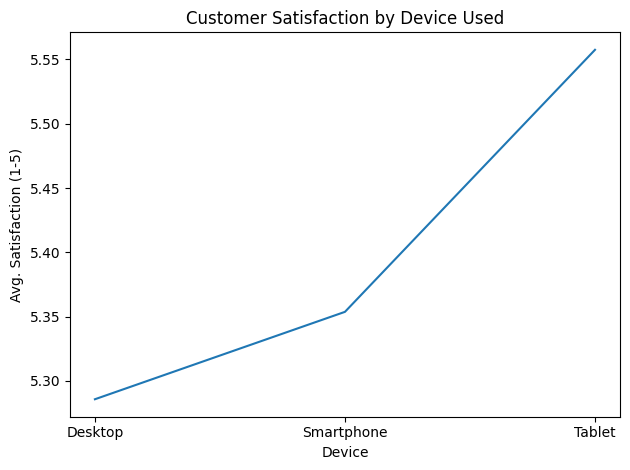

In [4]:
# Customer Satisfaction by Device Used for Shopping
# Are mobile or desktop users more satisfied?

# Group and plot
satisfaction_by_device = df.groupby("Device_Used_for_Shopping")["Customer_Satisfaction"].mean().reset_index()

sns.lineplot(data=satisfaction_by_device, x="Device_Used_for_Shopping", y="Customer_Satisfaction", palette="Set2")
plt.title("Customer Satisfaction by Device Used")
plt.xlabel("Device")
plt.ylabel("Avg. Satisfaction (1-5)")
plt.tight_layout()
plt.savefig("charts/satisfaction_by_device.png")
plt.show()

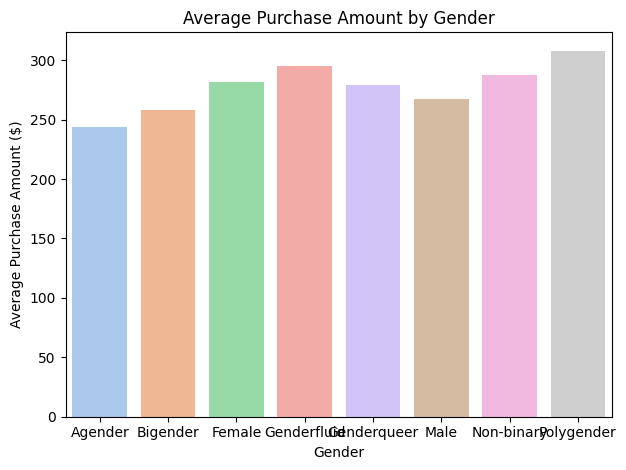

In [5]:
# Average Purchase Amount by Gender
# Understand if there is a difference in average spending between male and female customers.

# Group and calculate average purchase amount by Gender
avg_purchase_by_gender = df.groupby("Gender")["Purchase_Amount"].mean().reset_index()

# Plot
sns.barplot(x="Gender", y="Purchase_Amount", data=avg_purchase_by_gender, palette="pastel")
plt.title("Average Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Purchase Amount ($)")
plt.tight_layout()
plt.savefig("charts/avg_purchase_by_gender.png")
plt.show()